### Módulo 23 - Combinação de Modelos
## Tarefa 2

1 - Monte um passo a passo para o algoritmo RF

2 - Explique com suas palavras o Random Forest

3 - Qual a diferença entre Bagging e Random Forest?

3 - Implementar em Python o Random Forest

    - Bootstrap
    - Feature selection
    - Modelagem com Decision trees
    - Agregação

## 1

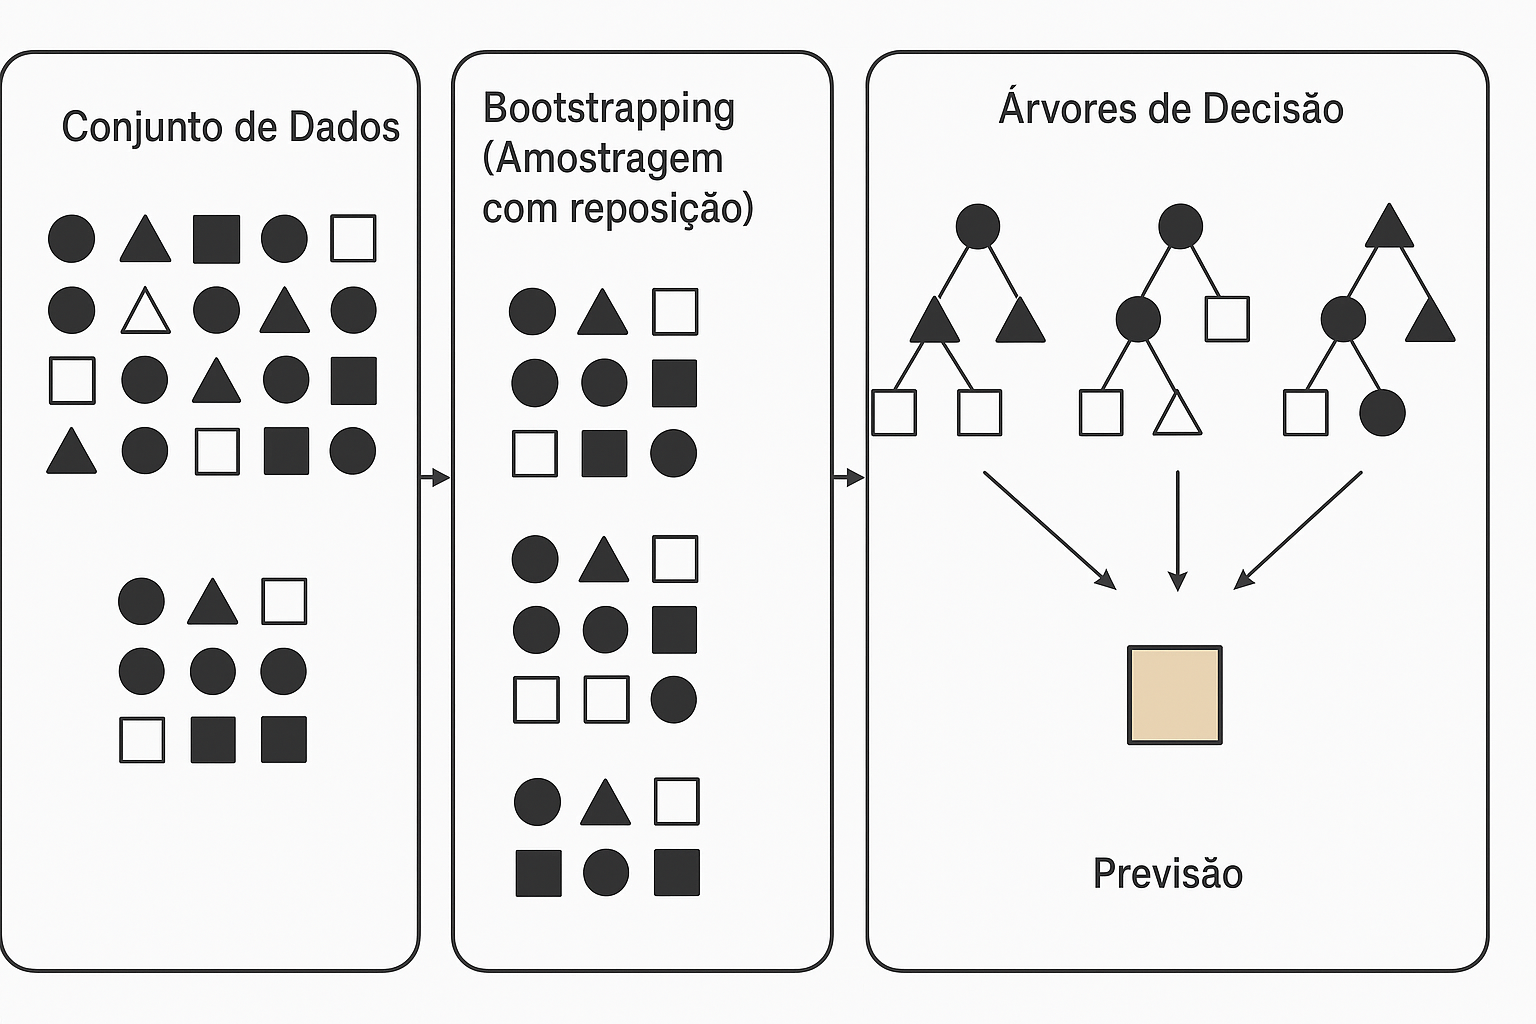

2

Em um conjunto de dados são gerados amostras ou subconjuntos de mesmo tamanho a partir dele, porém os dados de forma aleatória podem vir repetidos ou serem ausentes. O motivo para isso é que para cada dado que é pego do conjunto original e posto na amostra, é feito uma reposição desse dado no conjunto original, é uma espécie de sorteio onde o número sorteado é colocado novamente para ser sorteado. Isso é chamado de "amostragem com reposição" ou "bootstrap".

Cada amostra ou subconjunto são treinados modelos de árvore de decisão, de forma independente, reduzindo o risco de overfitting. Geralmente são construídas até seu máximo, sem limite de profundidade.

Após os modelos fazerem suas previsões vem a etapa de "agregação" ou "aggregating". Em modelos de classificação, o método utilizado é a votação por maioria, onde o resultado que mais se repete é o escolhido. Já se for de regressão, o método utilizado para o resultado será o de média aritmética.

3

As etapas são similares entre Bagging e Random Forest, com a diferença que se o método for o Random Forest, o modelo será de Árvore de Decisão.

4

```Python

# ---------------------------------------------
# Etapas do Random Forest
# ---------------------------------------------

# 1. Importação das bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from collections import Counter

# 2. Carregar um dataset exemplo (Iris apenas para demonstração)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3. Definições
n_trees = 3            # Número de árvores
n_samples = len(X)     # Tamanho da amostra bootstrap (igual ao dataset original)
max_features = 'sqrt'  # Quantidade de features usadas em cada split (raiz quadrada do total)

# 4. Etapas do Random Forest
predictions = []

for i in range(n_trees):
    print(f"\n🌳 Árvore {i+1}")
    
    # 4.1 Bootstrapping — Amostragem com reposição
    X_sample, y_sample = resample(X, y, replace=True, n_samples=n_samples, random_state=i)
    print(f"Amostra Bootstrap {i+1} gerada com {len(X_sample)} registros.")
    
    # 4.2 Criação da árvore de decisão com seleção aleatória de features
    tree = DecisionTreeClassifier(max_features=max_features, random_state=i)
    tree.fit(X_sample, y_sample)
    print(f"Árvore {i+1} treinada.")
    
    # 4.3 Realizando uma predição de exemplo (usando o primeiro registro do dataset)
    pred = tree.predict([X.iloc[0]])
    print(f"Predição da árvore {i+1} para o primeiro registro: {pred[0]}")
    predictions.append(pred[0])

# 5. Agregação — Votação da maioria
final_prediction = Counter(predictions).most_common(1)[0][0]
print("\n----------------------------")
print(f"🗳️  Votação final das árvores: {predictions}")
print(f"🔮 Predição final (maioria): {final_prediction}")
print("----------------------------")